<a href="https://colab.research.google.com/github/400lbhacker/Windows-64x-Caffe-Framework-Deepdream-installer/blob/master/beast_pytorch_automated_instance_img_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## beast pytorch img classifier 
improvements:
this is my personal mod v2 if you will of original Adversarial Activation Atlas tutorial
no img cropping required.  any/hd resolution now supported & previewd in original size.
automatic installatiobn, importation/upload & classification of img with no code editing/typing required.
minor ui improvement/procedural/verbosity enhancements 
entire process completed in seconds with just 2 clicks. 

## step1 - Install and Imports:




In [0]:
!pip -q install lucid>=0.3.1
# installing tensorflow 1.x
# %tensoflow_verion 1.x works only in colab
%tensorflow_version 1.x 

import numpy as np
import tensorflow as tf
assert tf.__version__.startswith("1")
import lucid.modelzoo.vision_models as models
from lucid.misc.io import show, load, save

# for resizing images
from PIL import Image

# for image uploader
from google.colab import files

# For plots
import matplotlib.pyplot as plt
model = models.InceptionV1()
model.load_graphdef()

print("initialization finished, you may now proceed to below code box")
def classify(image, n=10, show_output=True):
  im = Image.fromarray(np.uint8(image * 255.));
  im_resize = im.resize((224, 224), Image.LANCZOS)
  im_array = np.asarray(im_resize)/255.
  test_image = im_array[:,:,:3]
  tf.reset_default_graph()

  with tf.Session().as_default() as sess:
    input_t = tf.placeholder(tf.float32, shape=(224,224,3))
    model.import_graph(input_t)
    softmax2_t = sess.graph.get_tensor_by_name('import/softmax2:0')
    tf.global_variables_initializer().run()
    logits, = sess.run([softmax2_t], {input_t: test_image})
  
  BATCH = 0
  top_n_label_indices = np.argsort(logits)[BATCH][-n:][::-1]
  safe_top_n_label_indices = np.extract(top_n_label_indices < 1001, top_n_label_indices)
  top_n_labels = np.array(model.labels)[safe_top_n_label_indices]
  top_n_probs = logits[BATCH][safe_top_n_label_indices]
  max_length = max(len(label) for label in top_n_labels)
  predictions = ["{}: {: >6.2%}".format(label.rjust(max_length), prob) for (label, prob) in zip(top_n_labels, top_n_probs)]
  
  if show_output:
    
    print("\n".join(predictions))
  
  return (top_n_labels, top_n_probs)

# Takes two images and composites them
def composite_img(background_img, patch_img, patch_width_ratio=0.1, patch_position=(0.0, 0.0)):
  composite = background_img.copy()
  composite_img = Image.fromarray(np.uint8(composite * 255.))
  composite_img = composite_img.resize((224, 224), Image.LANCZOS)
  composite = (np.asarray(composite_img)/255.)[:,:,:3]

  if patch_width_ratio > 0: 
    patch_img_width = int(patch_width_ratio * 224)
    patch_img_ = Image.fromarray(np.uint8(patch_img[:,:,:3] * 255.))
    patch_img_thumb = patch_img_.resize((patch_img_width, patch_img_width), Image.LANCZOS)
    patch_img_thumb_array = np.asarray(patch_img_thumb)/255.
    patch_img_thumb_size = patch_img_thumb_array.shape

    patch_y = int(patch_position[1] * (224 - patch_img_thumb_size[1]))
    patch_x = int(patch_position[0] * (224 - patch_img_thumb_size[0]))

    
    composite[patch_y:patch_y + patch_img_thumb_size[1], patch_x:patch_x + patch_img_thumb_size[0], 0:3] = patch_img_thumb_array
    
  composite_img = Image.fromarray(np.uint8(composite * 255.))
  composite_img_resize = composite_img.resize((224, 224), Image.LANCZOS)
  composite_img_resize_array = np.asarray(composite_img_resize)/255.
  return composite_img_resize_array

TensorFlow 1.x selected.



initialization finished, you may now proceed to below code box


## choose & upload your desired photo to automaically classify:
step (2) of 2

Saving 2018-04-27-rita-eve-4to6-a7r3_1613.jpg to 2018-04-27-rita-eve-4to6-a7r3_1613.jpg



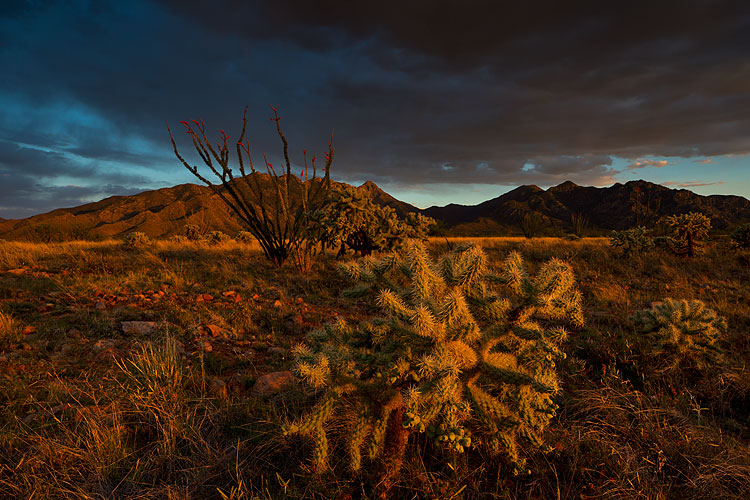

            alp: 42.99%
          cliff: 19.34%
     promontory: 13.06%
     stone wall:  3.08%
        volcano:  2.19%
         beacon:  1.92%
         tripod:  1.69%
         castle:  1.55%
       megalith:  1.24%
         valley:  1.15%
 cliff dwelling:  1.06%
       seashore:  0.53%
           barn:  0.51%
         thatch:  0.50%
     worm fence:  0.49%
    white stork:  0.48%
        bighorn:  0.38%
       lakeside:  0.35%
radio telescope:  0.34%
      ptarmigan:  0.33%
         church:  0.32%
     binoculars:  0.31%
          wreck:  0.27%
  mountain tent:  0.24%
       flagpole:  0.23%
  oystercatcher:  0.22%
      monastery:  0.22%
            ram:  0.20%
   coral fungus:  0.20%
   picket fence:  0.17%
img classification & tutorial finished


In [0]:
uploaded = files.upload()
f = list(uploaded.keys())[0]
user_img = load(f)
show(user_img)
classify(user_img, 30)
print("img classification & tutorial finished")